# Downloads and Imports

In [ ]:
!pip install pycountry
!pip install countryinfo
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

import plotly.express as px
import folium
import requests
import numpy as np
import re
from bs4 import BeautifulSoup
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [ ]:
!mkdir ./datasets

# download the dataset from Kaggle and unzip it
!kaggle datasets download idodahan1/amsterdam-riots -p ./datasets/
!unzip ./datasets/amsterdam-riots.zip  -d ./datasets/

Dataset URL: https://www.kaggle.com/datasets/idodahan1/amsterdam-riots
License(s): apache-2.0
  0% 0.00/5.27M [00:00<?, ?B/s]
100% 5.27M/5.27M [00:00<00:00, 101MB/s]
Archive:  ./datasets/amsterdam-riots.zip
  inflating: ./datasets/2023-10-07-2025-01-19-Europe protests and riots.csv  
  inflating: ./datasets/Israeli teams basketball games in europe 2023-2025.xlsx  
  inflating: ./datasets/Israeli teams football games in europe 2023-2025.xlsx  


## Israel-Hamas war related protests in Europe

Get Europe riots and protests data

In [ ]:
protests_df=pd.read_csv('datasets/2023-10-07-2025-01-19-Europe protests and riots.csv')

Get Israel-Hamas war related protests and riots by country and month

In [ ]:
# Keywords to search for
keywords = [ 'israel', 'palestine', 'palestinians', 'hamas', 'gaza','genocide']
protests_df['event_date'] = pd.to_datetime(protests_df['event_date'])
# Extract month from event_date
protests_df['month'] = protests_df['event_date'].dt.to_period('M')  # Use 'M' for month

# Keywords to search for
keywords = ['israel', 'palestine', 'palestinian', 'hamas', 'gaza']

# Step 1: Count how many times each (country, month) pair appears
grouped_counts = protests_df.groupby(['country', 'month']).size().reset_index(name='total protests number')

# Step 2: Count how many notes contain at least one keyword
protests_df['Israel-Hamas war protests related'] = protests_df['notes'].apply(lambda x: any(keyword in x.lower() for keyword in keywords))
keyword_counts = protests_df.groupby(['country', 'month'])['Israel-Hamas war protests related'].sum().reset_index(name='Israel-Hamas war protests related')

# Step 3: Merge the counts and calculate the ratio
protests_by_date = pd.merge(grouped_counts, keyword_counts, on=['country', 'month'])
protests_by_date = protests_by_date.sort_values(by='month')


protests_by_date

<ipython-input-5-5a7ebd966844>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  protests_df['event_date'] = pd.to_datetime(protests_df['event_date'])


,country,month,total protests number,Israel-Hamas war protests related
101,Croatia,2023-10,10,1
426,Montenegro,2023-10,24,3
442,Netherlands,2023-10,56,36
458,North Macedonia,2023-10,16,1
474,Norway,2023-10,45,27
...,...,...,...,...
38,Austria,2025-01,14,0
164,Denmark,2025-01,17,2
505,Poland,2025-01,19,1
327,Italy,2025-01,126,17


Show the number of protests and riots related to the Israel-Hamas war over time in each country

In [ ]:


# Create the choropleth map
fig = px.choropleth(
    protests_by_date,
    locations="country",
    color="Israel-Hamas war protests related",
    locationmode="country names",
    animation_frame='month',
    scope='world',  # Use 'world' to allow full control over zoom and center
    color_continuous_scale=px.colors.sequential.Plasma,  # Choose a color scale
    labels={'Israel-Hamas war protests related': 'Protests and Riots'}  # Label for the color scale
)

# Update layout for better visualization
fig.update_layout(
    title_text="Protests and Riots Related to Israel-Hamas War<br>in Europe and Surrounding Regions (Oct 2023 - Jan 2025)",
    title_x=0.5,  # Center the title
    title_font=dict(size=14),  # Adjust title font size if needed
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',  # Use a standard projection
        center=dict(lat=55, lon=20),  # Center the map on Europe and surrounding regions
        projection_scale=3
    )
)

# Adjust animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # Set animation speed (in milliseconds)
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500  # Set transition speed (in milliseconds)

# Show the map
fig.show()

Filter protests only by country

In [ ]:
# Group by 'country' and sum the relevant columns
protests_by_country = protests_by_date[protests_by_date['month']<'2024-11'].groupby('country', as_index=False).agg({
    'total protests number': 'sum',
    'Israel-Hamas war protests related': 'sum'
})

# Calculate the ratio of war-related protests to total protests
protests_by_country['Israel_Hamas_war_protests_percentage'] = (protests_by_country['Israel-Hamas war protests related'] / protests_by_country['total protests number'])*100
protests_by_country

,country,total protests number,Israel-Hamas war protests related,Israel_Hamas_war_protests_percentage
0,Akrotiri and Dhekelia,2,2,100.000000
1,Albania,100,1,1.000000
2,Andorra,5,0,0.000000
3,Austria,374,51,13.636364
4,Azerbaijan,11,1,9.090909
5,Bailiwick of Guernsey,1,0,0.000000
6,Belarus,2,0,0.000000
7,Belgium,845,178,21.065089
8,Bosnia and Herzegovina,134,23,17.164179
9,Bulgaria,505,1,0.198020


Show percentage of protests related to the Israel-Hamas war in selected countries

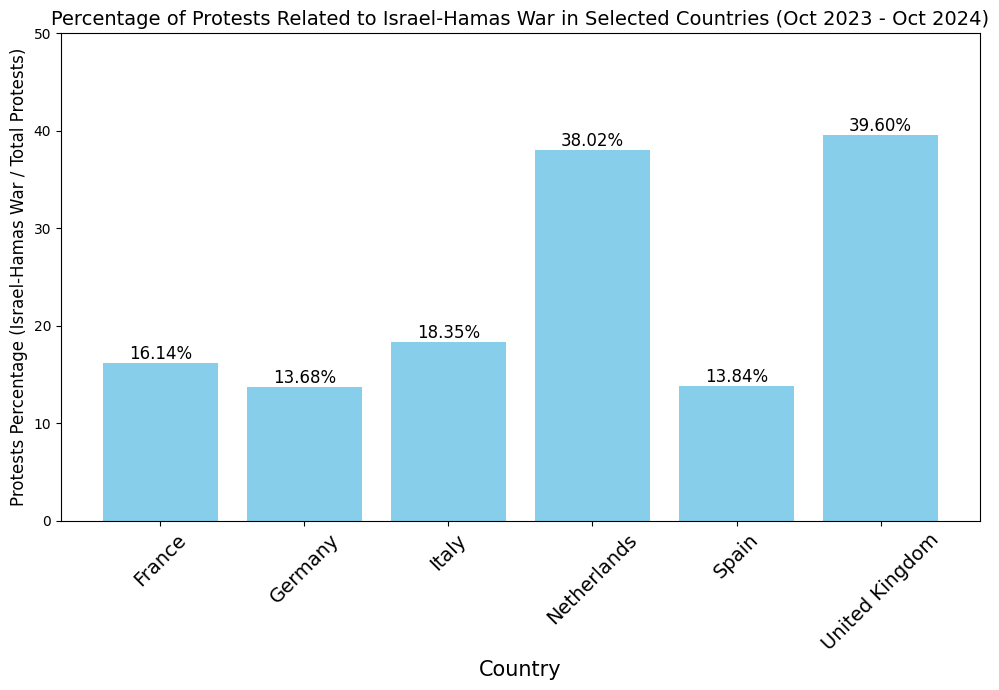

In [ ]:

temp_protests_by_country = protests_by_country[protests_by_country['country'].isin(['France','Germany','Italy','Netherlands','Spain','United Kingdom'])]

# Set up the plot
plt.figure(figsize=(10, 7))

# Plotting
plt.bar(temp_protests_by_country['country'], temp_protests_by_country['Israel_Hamas_war_protests_percentage'], color='skyblue')

# Customize the plot
plt.xlabel('Country',fontsize=15)
plt.ylabel('Protests Percentage (Israel-Hamas War / Total Protests)',fontsize=12)
plt.title('Percentage of Protests Related to Israel-Hamas War in Selected Countries (Oct 2023 - Oct 2024)',fontsize = 14)
plt.ylim(0, 50)
plt.xticks(rotation=45,fontsize = 14)

# Add value labels on top of bars
for i, ratio in enumerate(temp_protests_by_country['Israel_Hamas_war_protests_percentage']):
    plt.text(i, ratio + 0.01, f'{ratio:.2f}%', ha='center', va='bottom',fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Protests Over Time

Show the number of Israel-Hamas war related protests over time in Europe and the Netherlands

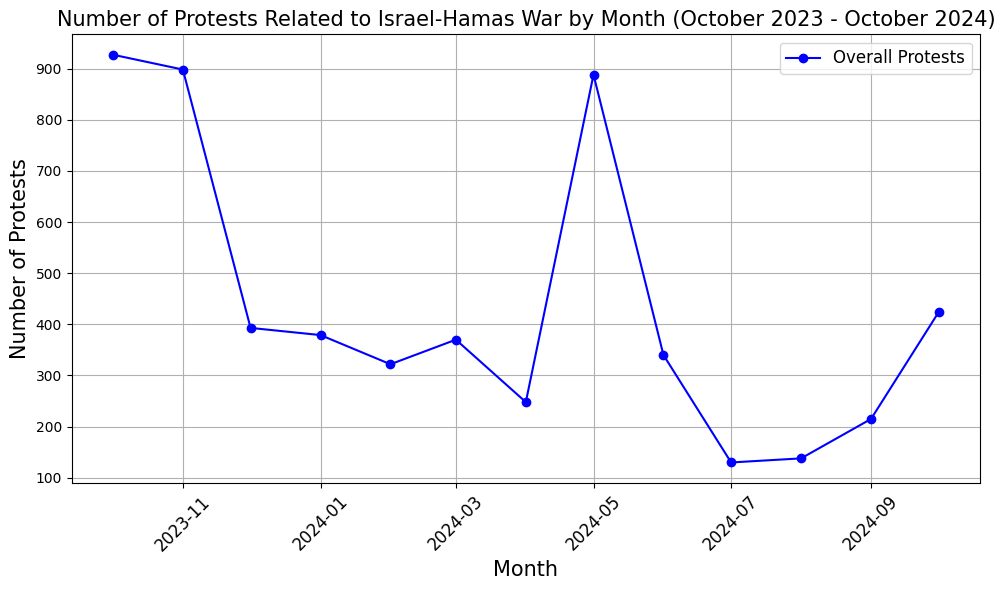

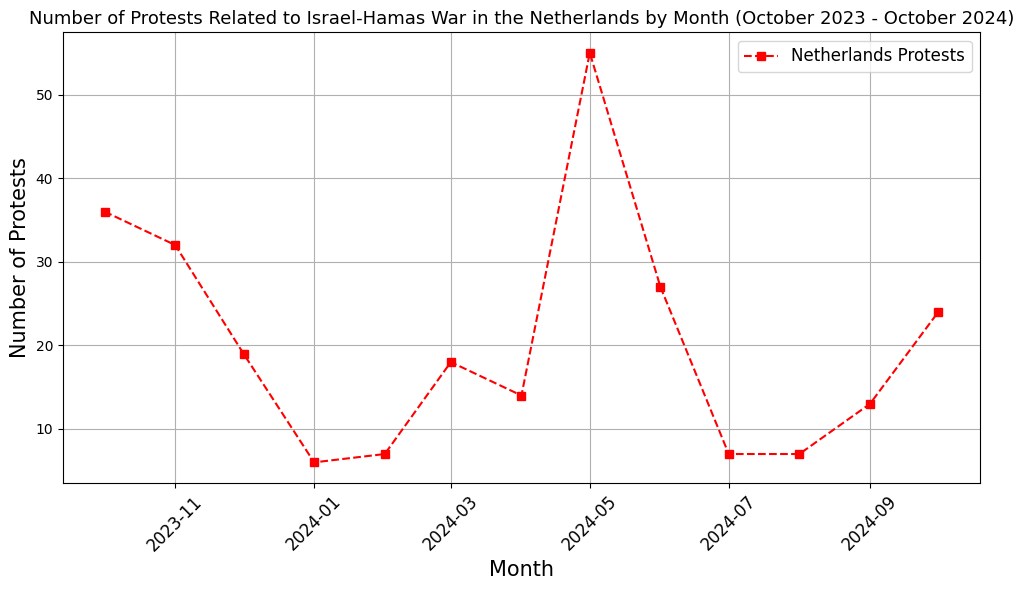

In [ ]:
# Create a regex pattern for the keywords
pattern = '|'.join(keywords)

# Filter the DataFrame for protests containing keywords
filtered_df = protests_df[protests_df['notes'].str.contains(pattern, case=False, na=False)]

# Filter data for the specified date range
start_date = '2023-10-07'
end_date = '2024-10-31'
filtered_df = filtered_df[(filtered_df['event_date'] >= start_date) & (filtered_df['event_date'] <= end_date)]

# Extract year and month from the event_date column
filtered_df['year_month'] = filtered_df['event_date'].dt.to_period('M')

# Group by year_month and count the number of protests (overall)
protests_by_month = filtered_df.groupby('year_month').size()

# Filter data for the Netherlands
netherlands_df = filtered_df[filtered_df['country'] == 'Netherlands']
netherlands_by_month = netherlands_df.groupby('year_month').size()

# Convert Period index to datetime for plotting
protests_by_month.index = protests_by_month.index.to_timestamp()
netherlands_by_month.index = netherlands_by_month.index.to_timestamp()

# Set up the first plot (Overall Protests)
plt.figure(figsize=(10, 6))
plt.plot(protests_by_month.index, protests_by_month.values, marker='o', linestyle='-', color='b', label='Overall Protests')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Protests', fontsize=15)
plt.title('Number of Protests Related to Israel-Hamas War by Month (October 2023 - October 2024)', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Set up the second plot (Netherlands Protests)
plt.figure(figsize=(10, 6))
plt.plot(netherlands_by_month.index, netherlands_by_month.values, marker='s', linestyle='--', color='r', label='Netherlands Protests')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Protests', fontsize=15)
plt.title('Number of Protests Related to Israel-Hamas War in the Netherlands by Month (October 2023 - October 2024)', fontsize=13)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Pro-Palestinians Protests vs Pro-Israel Protests

Get affiliation of protests by selected keywords and show ratio of pro-palestine and pro-israel protests

In [ ]:
pro_israel_keywords = [ 'pro-israel', 'support israel', 'stand with israel','antisemitism',
                       'solidarity with israel','hamas massacre','release the hostages']
pro_palestine_keywords = ['pro-palestine', 'free palestine', 'genocide','pro-palestinian',
                          'solidarity with the palestinian','solidarity with palestine']

protests_affiliation = protests_df[protests_df['event_date']<'2024-11-07']
# Classify protests
protests_affiliation['pro_israel'] = protests_affiliation['notes'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in pro_israel_keywords) else 0)
protests_affiliation['pro_palestine'] = protests_affiliation['notes'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in pro_palestine_keywords) else 0)

# Aggregate by country
protests_by_affiliation = protests_affiliation.groupby('country', as_index=False).agg({
    'pro_israel': 'sum',
    'pro_palestine': 'sum'
})

protests_by_affiliation = protests_by_affiliation.merge(protests_by_country[['Israel-Hamas war protests related','country']], on='country', how='left')
# Calculate total protests
protests_by_affiliation['total_protests'] = protests_by_affiliation['pro_israel']+protests_by_affiliation['pro_palestine']

# Calculate ratios
protests_by_affiliation['pro_israel_ratio'] = protests_by_affiliation['pro_israel'] / protests_by_affiliation['total_protests']
protests_by_affiliation['pro_palestine_ratio'] = protests_by_affiliation['pro_palestine'] / protests_by_affiliation['total_protests']

# Display the result
protests_by_affiliation

<ipython-input-10-7d59e047c16a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-7d59e047c16a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,pro_israel,pro_palestine,Israel-Hamas war protests related,total_protests,pro_israel_ratio,pro_palestine_ratio
0,Akrotiri and Dhekelia,0,2,2,2,0.000000,1.000000
1,Albania,0,0,1,0,NaN,NaN
2,Andorra,0,0,0,0,NaN,NaN
3,Austria,3,33,51,36,0.083333,0.916667
4,Azerbaijan,0,0,1,0,NaN,NaN
5,Bailiwick of Guernsey,0,0,0,0,NaN,NaN
6,Belarus,0,0,0,0,NaN,NaN
7,Belgium,6,74,178,80,0.075000,0.925000
8,Bosnia and Herzegovina,0,10,23,10,0.000000,1.000000
9,Bulgaria,0,0,1,0,NaN,NaN


A map that shows the percentage of pro-palestine protests in europe out of all affiliated protests related to the war.

In [ ]:


# Load the world GeoJSON file
world_geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
world_geojson = requests.get(world_geojson_url).json()

# Merge the protest data into the GeoJSON properties
for feature in world_geojson['features']:
    country_name = feature['properties']['name']
    # Add pro-Palestine data
    pro_palestine_value = protests_by_affiliation.loc[protests_by_affiliation['country'] == country_name, 'pro_palestine'].values
    if len(pro_palestine_value) > 0:
        feature['properties']['pro_palestine'] = int(pro_palestine_value[0])
    else:
        feature['properties']['pro_palestine'] = 0  # Default to 0 for countries without data
    # Add pro-Israel data
    pro_israel_value = protests_by_affiliation.loc[protests_by_affiliation['country'] == country_name, 'pro_israel'].values
    if len(pro_israel_value) > 0:
        feature['properties']['pro_israel'] = int(pro_israel_value[0])
    else:
        feature['properties']['pro_israel'] = 0  # Default to 0 for countries without data
    # Add pro-Palestine ratio data
    ratio_value = protests_by_affiliation.loc[protests_by_affiliation['country'] == country_name, 'pro_palestine_ratio'].values
    if len(ratio_value) > 0:
        feature['properties']['pro_palestine_ratio'] = float(ratio_value[0])
    else:
        feature['properties']['pro_palestine_ratio'] = 0  # Default to 0 for countries without data

# Create a Folium map centered on Europe
m = folium.Map(location=[55, 20], zoom_start=4, tiles="CartoDB positron")

# Add a choropleth layer to the map
choropleth = folium.Choropleth(
    geo_data=world_geojson,  # GeoJSON file
    name="choropleth",
    data=protests_by_affiliation,  # DataFrame with country and protest data
    columns=["country", "pro_palestine_ratio"],  # Columns for country names and pro-Palestine ratio
    key_on="feature.properties.name",  # Key in GeoJSON to match with country names
    fill_color="YlOrRd",  # Color scale (yellow to red)
    fill_opacity=0.7,  # Opacity of the fill color
    line_opacity=0.2,  # Opacity of the boundary lines
    legend_name="Ratio of Pro-Palestine Protests",  # Legend title
).add_to(m)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:16px"><b>
             Ratio of Pro-Palestine Protests by Country (October 7th 2023 - November 6th 2025)
             </b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Add tooltips to show country names, pro-Palestine protests, pro-Israel protests, and pro-Palestine ratio
geojson_layer = folium.GeoJson(
    world_geojson,
    name="geojson",
    style_function=lambda x: {
        'fillColor': '#ffffff',  # Neutral fill color
        'color': '#000000',  # Border color
        'weight': 0.1  # Border weight
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name", "pro_palestine", "pro_israel", "pro_palestine_ratio"],  # Fields to display in the tooltip
        aliases=["Country: ", "Pro-Palestine Protests: ", "Pro-Israel Protests: ", "Pro-Palestine Ratio: "],  # Labels for the tooltip fields
        localize=True
    )
).add_to(m)



# Add layer control to toggle the choropleth layer
folium.LayerControl().add_to(m)

# Save the map to an HTML file (optional)
m.save("pro_palestine_ratio_map.html")

# Display the map
m

# Dataset Creation

## Create negative sampling data(Football and Basketball games)

Get basketball games of israeli teams between October 7th 2023 to January 19 2025.

In [ ]:
basketball_games=pd.read_excel('datasets/Israeli teams basketball games in europe 2023-2025.xlsx')
basketball_games

,Competition,Date,Time,Game,Result,City,Country
0,EuroCup,2023-10-17,21:00:00,Venice - Hapoel Tel Aviv,97:81,Venice,Italy
1,EuroLeague,2023-10-18,21:30:00,Valencia - Maccabi Tel Aviv,66:75,Valencia,Spain
2,EuroLeague,2023-10-20,21:15:00,Panathinaikos - Maccabi Tel Aviv,86:81,Athens,Greece
3,EuroCup,2023-10-24,20:30:00,Hamburg Towers - Hapoel Tel Aviv,111:72,Hamburg,Germany
4,EuroLeague,2023-10-26,22:00:00,Monaco - Maccabi Tel Aviv,79:107,Monaco,France
...,...,...,...,...,...,...,...
64,Champions,2025-01-07,19:00:00,Petkim Spor - Hapoel Holon,81:82,Izmir,Turkey
65,Eurocup,2025-01-08,19:00:00,Cluj-Napoca - Hapoel Jerusalem,91:79,Cluj-Napoca,Romania
66,Champions,2025-01-08,20:00:00,Falco Szombathely - Maccabi Rishon LeZion,81:88,Szombathely,Hungary
67,Euroleague,2025-01-14,21:45:00,Real Madrid - Maccabi Tel Aviv,113:116,Madrid,Spain


Get football games of israeli teams between October 7th 2023 to January 19 2025.

In [ ]:
football_games=pd.read_excel('/content/datasets/Israeli teams football games in europe 2023-2025.xlsx')
football_games

,Season,Team,Competition,Stage,Opponent,Date,Away,Away Stadium,City,Country
0,2024/25,Hapoel Be'er Sheva,Conference League,Second Qualifying Round,Cherno More Varna,2024-08-01,1-2,Huvepharma Arena,Razgrad,Bulgaria
1,2024/25,Hapoel Be'er Sheva,Conference League,Third Qualifying Round,Mladá Boleslav,2024-08-08,1-1,Lokotrans Arena,Mladá Boleslav,Czech Republic
2,2023/24,Maccabi Haifa,Europa League,Group Stage,Villarreal,2023-12-06,0-0,Estadio de la Cerámica,Villarreal,Spain
3,2023/24,Maccabi Haifa,Europa League,Group Stage,Panathinaikos,2023-12-14,1-2,Apostolos Nikolaidis Stadium,Athens,Greece
4,2023/24,Maccabi Haifa,Conference League,Preliminary Knockout Round,Gent,2024-02-21,1-1,KAA Gent Arena,Ghent,Belgium
5,2023/24,Maccabi Haifa,Conference League,Round of 16,Fiorentina,2024-03-14,1-1,Artemio Franchi,Florence,Italy
6,2024/25,Maccabi Haifa,Conference League,Second Qualifying Round,Sabah,2024-08-01,3-6,Bank Respublika Arena,Absheron,Azerbaijan
7,2024/25,Maccabi Petah Tikva,Europa League,Second Qualifying Round,Sporting Braga,2024-07-25,2-0,Estádio Municipal de Braga,Braga,Portugal
8,2024/25,Maccabi Petah Tikva,Conference League,Third Qualifying Round,CFR Cluj,2024-08-15,1-0,Stadionul Dr. Constantin Rădulescu,Cluj-Napoca,Romania
9,2023/24,Maccabi Tel Aviv,Conference League,Group Stage,Zorya Luhansk,2023-11-09,1-3,Arena Lublin,Lublin,Poland


Merge the basketball df and the football df and keep only relevant columns.

In [ ]:
df1_subset = football_games[['Country', 'City', 'Date']]
df2_subset = basketball_games[['Country', 'City', 'Date']]

# Now concatenate (append) the rows from the second dataframe to the first
negative_sampling_df = pd.concat([df1_subset, df2_subset], axis=0)

negative_sampling_df = negative_sampling_df.reset_index(drop=True)
# Sort the merged dataframe by the Date column
negative_sampling_df = negative_sampling_df.sort_values(by='Date')


,Country,City,Date
22,Italy,Venice,2023-10-17
23,Spain,Valencia,2023-10-18
24,Greece,Athens,2023-10-20
25,Germany,Hamburg,2023-10-24
26,France,Monaco,2023-10-26
...,...,...,...
86,Turkey,Izmir,2025-01-07
87,Romania,Cluj-Napoca,2025-01-08
88,Hungary,Szombathely,2025-01-08
89,Spain,Madrid,2025-01-14


## Create positive sampling data(Protests and riots)


Read the protests/riots dataset and remove peaceful protests(keep only protests that had police intervention and riots)

In [ ]:
df = pd.read_csv('datasets/2023-10-07-2025-01-19-Europe protests and riots.csv')
df['event_date'] = pd.to_datetime(df['event_date'])
df = df[df['sub_event_type'] != 'Peaceful protest']

<ipython-input-17-cd99021def5b>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Get number of participants in the protest/riot

In [ ]:

# Get protest crowd size from tags column
def convert_crowd_size(tag):
    if pd.isna(tag):
        return np.nan

    # Remove 'crowd size=' prefix and commas
    text = tag.replace('crowd size=', '').replace(',', '').lower()

    # Dictionary for qualitative terms
    qualitative_map = {
        'tens': 30,
        'dozens': 24,
        'several dozen': 36,
        'a few dozen': 36,
        'hundreds': 300,
        'several hundred': 300,
        'a few hundred': 300,
        'thousands': 2000,
        'several thousand': 3000,
        'tens of thousands': 20000,
        'large': 5000,  # arbitrary large number
        'scores': 20,
        'several': 5,
        'no report': np.nan,
        'no several': np.nan,
        'three': 3,
        'many': 100,
        'a couple of hundred': 2000,
        'four': 4,
        'a handful': 10,
        'small': 20,
        'no repor': np.nan,
        'low three-digit range': 100,
        'fifteen': 15,
        'half a thousand': 500,
        'six': 6,
        'nearly two hundred': 200,
        ' two dozen': 24,
        'two dozen': 24,
        'a few': 20,
        'a hundred': 100,
        'a small group': 10,
        'numerous': 10,
        'a massive protest': 10000,
        'a dozen': 12,
        'some': 3,
        'one': 1,
        'nine': 9,
        'fifty': 50,
        'five': 5,
        'eight': 8,
        'no size': 0,
        'local administrators': 10,
        'seven': 7,
        'a number': 5
    }

    # Check for exact matches first
    for key in qualitative_map:
        if key in text:
            return qualitative_map[key]

    # Extract all numbers from the text
    numbers = [int(num) for num in re.findall(r'\d+', text)]

    # Handle different patterns
    if 'more than' in text or 'over' in text or 'at least' in text:
        return max(numbers) if numbers else np.nan
    elif 'between' in text or 'to' in text or '-' in text:
        if len(numbers) >= 2:
            return np.mean(numbers).round()
        elif len(numbers) == 1:
            return numbers[0]
    elif 'around' in text or 'about' in text or 'approximately' in text:
        return np.mean(numbers).round() if numbers else np.nan
    elif 'up to' in text:
        return max(numbers) if numbers else np.nan
    elif 'just under' in text:
        return numbers[0] - 1 if numbers else np.nan

    # Default case for remaining numerical values
    return numbers[0] if numbers else text

# Apply the conversion to your DataFrame
df['crowd_size'] = df['tags'].apply(convert_crowd_size).astype('Int64')

# Show some example conversions
print(df[['tags', 'crowd_size']].head(20))

                                           tags  crowd_size
2                    crowd size=several hundred         300
4                          crowd size=about 300         300
38                         crowd size=no report        <NA>
59             crowd size=between 1300 and 1400        1350
75                        crowd size=around 350         350
88                   crowd size=several hundred         300
101                     crowd size=around 1,400        1400
104                     crowd size=around 7,850        7850
107                       crowd size=around 350         350
109                        crowd size=no report        <NA>
141  crowd size=no report; local administrators        <NA>
144                        crowd size=around 15          15
191                        crowd size=thousands        2000
196                    crowd size=several dozen          36
208                        crowd size=no report        <NA>
209                       crowd size=aro

Filter only pro-palestinian protests with more then 400 participants to avoid data imbalance

In [ ]:
df = df[df['crowd_size']>=400]

# Keywords to include
include_keywords = ['pro-palestine', 'free palestine', 'genocide','pro-palestinian',
                          'solidarity with the palestinian','solidarity with palestine']
include_pattern = '|'.join(include_keywords)

# Keywords to exclude
exclude_keywords = ['antisemitism']
exclude_pattern = '|'.join(exclude_keywords)

# Filter rows where include_keywords appear AND exclude_keywords do not appear
df = df[
    df['notes'].str.contains(include_pattern, case=False, na=False)
]
df.sort_values(by='event_date')

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,crowd_size
40211,GBR6832,2023-10-14,2023,1,Demonstrations,Protests,Protest with intervention,Protesters (United Kingdom),CND: Campaign for Nuclear Disarmament; Governm...,Protesters,...,51.4973,-0.1372,1,Guardian (United Kingdom); MyLondon; The Star ...,Subnational-National,"On 14 October 2023, 150,000 (according to the ...",0,"crowd size=150,000 (according to the Friends o...",1734465845,150000
40060,NLD2684,2023-10-15,2023,1,Demonstrations,Protests,Protest with intervention,Protesters (Netherlands),XR: Extinction Rebellion,Protesters,...,52.3710,4.8985,1,AT 5; Dutch Police; Het Parool; NRC Handelsblad,Subnational-National,"On 15 October 2023, at the call of Plant an Ol...",0,"crowd size=around 15,000",1739905335,15000
40047,DEU17516,2023-10-15,2023,1,Demonstrations,Riots,Violent demonstration,Rioters (Germany),NaN,Rioters,...,52.5177,13.4024,1,Berliner Zeitung; Merkur; Saarbruecker Zeitung,Subnational-National,"On 15 October 2023, around 1,000 people gather...",0,"crowd size=around 1,000",1733203731,1000
39922,DEU17537,2023-10-17,2023,1,Demonstrations,Riots,Violent demonstration,Rioters (Germany),NaN,Rioters,...,52.5177,13.4024,1,Berliner Zeitung,Subnational,"On 17 October 2023, during the evening, around...",0,crowd size=around 700,1733203731,700
39888,GRC4643,2023-10-17,2023,1,Demonstrations,Protests,Protest with intervention,Protesters (Palestine),Protesters (Syria); Refugees/IDPs (Palestine);...,Protesters,...,37.7574,26.9762,1,To Pontiki; To Vima,National,"On 17 October 2023, during the night, about 70...",0,crowd size=about 700,1715131290,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,DEU23221,2024-11-25,2024,1,Demonstrations,Riots,Violent demonstration,Rioters (Germany),NaN,Rioters,...,52.5010,13.4403,1,Der Tagesspiegel; Suddeutsche Zeitung,Subnational-National,"On 25 November 2024, up to 1,700 people gather...",0,"crowd size=up to 1,700",1733261065,1700
3511,ITA25116,2024-11-29,2024,1,Demonstrations,Riots,Violent demonstration,Rioters (Italy),CGIL: Italian General Confederation of Labor; ...,Rioters,...,45.0735,7.6756,1,La Nuova Venezia; Torino Today,Subnational-National,"On 29 November 2024, as part of a national dem...",0,"crowd size=more than 15,000",1733261077,15000
3414,NLD3465,2024-11-30,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (Netherlands),PEGIDA: Patriotic Europeans Against the Islami...,Protesters,...,52.3710,4.8985,1,AD; AT 5,Subnational-National,"On 30 November 2024, between 500 and 1,000 pro...",0,"crowd size=between 500 and 1,000",1733860836,750
681,DEU23534,2025-01-11,2025,1,Demonstrations,Riots,Violent demonstration,Rioters (Germany),NaN,Rioters,...,52.5177,13.4024,1,Der Tagesspiegel; Suddeutsche Zeitung,Subnational-National,"On 11 January 2025, under the motto 'Solidarit...",0,crowd size=around 450,1737495240,450


In [ ]:

df = df.sort_values(by='event_date')

# Reset index numbers after sorting if needed
df = df.reset_index(drop=True)

## Merging the datsets

In [ ]:
df = df[['country','location','event_date']]

In [ ]:
df = df.rename(columns={'country': 'Country',	'location': 'City',	'event_date': 'Date'})

In [ ]:
negative_sampling_df['Label'] = 0
# Change the label of the amsterdam riot
negative_sampling_df.loc[(negative_sampling_df['City'] == 'Amsterdam') & (negative_sampling_df['Date'] == '2024/11/07'), 'Label'] = 1
df['Label'] = 1

Get the city name where the protest happened

In [ ]:

df['City'] = df['City'].str.split('-', n=1).str[0]
merged_df = pd.concat([df, negative_sampling_df], axis=0).sort_values(by='Date')
merged_df['City'] = merged_df['City'].apply(lambda x: x.strip())
merged_df['Country'] = merged_df['Country'].apply(lambda x: x.strip())
merged_df = merged_df.reset_index(drop=True)
merged_df

,Country,City,Date,Label
0,United Kingdom,London,2023-10-14,1
1,Netherlands,Amsterdam,2023-10-15,1
2,Germany,Berlin,2023-10-15,1
3,Germany,Berlin,2023-10-17,1
4,Greece,Samos,2023-10-17,1
...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0
169,Germany,Berlin,2025-01-11,1
170,Spain,Madrid,2025-01-14,0
171,Montenegro,Podgorica,2025-01-15,0


# Feature Engineering

## Add number of Palestinians Casualties

The data was taken from an open source initiative of the Tech For Palestine collective and it's the data reported to the world by the health ministry of the palestinian authority

In [ ]:


# URL of the JSON data
url = "https://data.techforpalestine.org/api/v2/casualties_daily.json"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()

    # Convert the JSON data to a DataFrame
    weekly_palestinians_casualties = pd.DataFrame(data)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

weekly_palestinians_casualties

,report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,...,ext_press_killed_cum,killed_children_cum,killed_women_cum,injured,massacres_cum,civdef_killed_cum,killed_recovered,killed_truce_new,killed_succumbed,killed_committee
0,2023-10-07,mohtel,24,0,232.0,232.0,232,232,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-08,mohtel,24,0,138.0,370.0,138,370,78,41,...,1,78.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-09,mohtel,24,8,190.0,560.0,190,560,91,61,...,3,91.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-10,mohtel,24,8,340.0,900.0,340,900,260,230,...,7,260.0,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-11,gmotel,24,23,200.0,1100.0,200,1100,398,230,...,7,NaN,NaN,1029.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2025-02-25,mohtel,24,4034,2.0,48348.0,2,48348,17861,12316,...,205,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN
508,2025-02-26,mohtel,0,4034,0.0,48348.0,0,48348,17861,12316,...,205,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
509,2025-02-27,mohtel,48,4034,17.0,48365.0,17,48365,17861,12316,...,205,NaN,NaN,19.0,NaN,NaN,NaN,17.0,NaN,NaN
510,2025-02-28,mohtel,0,4034,0.0,48365.0,0,48365,17861,12316,...,205,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weekly_palestinians_casualties['report_date'] = pd.to_datetime(weekly_palestinians_casualties['report_date'])

Get the number of palestinian casualties from the week before the event

In [ ]:
# Add a new column to final_df for the weekly casualties
merged_df['weekly_palestinians_casualties'] = 0

# Iterate through each row in final_df
for index, row in merged_df.iterrows():
    # Calculate the date range for the previous 7 days (excluding the Date itself)
    start_date = row['Date'] - pd.Timedelta(days=7)
    end_date = row['Date'] - pd.Timedelta(days=1)

    # Filter df for rows within the 7-day range
    mask = (weekly_palestinians_casualties['report_date'] >= start_date) & (weekly_palestinians_casualties['report_date'] <= end_date)
    filtered_df = weekly_palestinians_casualties[mask]

    # Sum the 'killed' column for the filtered rows
    weekly_casualties = filtered_df['killed'].sum()

    # Add the sum to the corresponding row in final_df
    merged_df.at[index, 'weekly_palestinians_casualties'] = weekly_casualties
merged_df

,Country,City,Date,Label,weekly_palestinians_casualties
0,United Kingdom,London,2023-10-14,1,1900
1,Netherlands,Amsterdam,2023-10-15,1,1996
2,Germany,Berlin,2023-10-15,1,1996
3,Germany,Berlin,2023-10-17,1,2248
4,Greece,Samos,2023-10-17,1,2248
...,...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0,344
169,Germany,Berlin,2025-01-11,1,348
170,Spain,Madrid,2025-01-14,0,730
171,Montenegro,Podgorica,2025-01-15,0,760


## Add Muslim Population Precentage

The data was taken from kaggle

In [ ]:

# download the dataset from Kaggle and unzip it
!kaggle datasets download ifeanyichukwunwobodo/muslim-population -p ./datasets/
!unzip ./datasets/muslim-population.zip  -d ./datasets/

Dataset URL: https://www.kaggle.com/datasets/ifeanyichukwunwobodo/muslim-population
License(s): unknown
  0% 0.00/4.16k [00:00<?, ?B/s]
100% 4.16k/4.16k [00:00<00:00, 8.84MB/s]
Archive:  ./datasets/muslim-population.zip
  inflating: ./datasets/muslim_pop.csv  


In [ ]:
muslim_df = pd.read_csv('/content/datasets/muslim_pop.csv')
muslim_df

,Country/Region,Total Population,Muslim Population,Muslim percentage of total population,Percentage of world (%)
0,Afghanistan,37135000,37025000,99.7,2.0
1,Albania,3057220,1797645,58.8,0.1
2,Algeria,44178884,43737096,99,2.7
3,American Samoa,50826,"< 1,000",< 0.1,< 0.1
4,Andorra,85708,2228,2.6,< 0.1
...,...,...,...,...,...
227,Wallis and Futuna,15714,"< 1,000",< 0.1,< 0.1
228,Western Sahara,603253,599633,99.4,< 0.1
229,Yemen,27036829,26784498,97.2,1.5
230,Zambia,16887720,168877,1,< 0.1


Add percentage of country muslim population

In [ ]:


# Merge the datasets
merged_df = pd.merge(
    merged_df,
    muslim_df[["Country/Region", "Muslim percentage of total population"]],
    left_on="Country",
    right_on="Country/Region",
    how="left"
)

# Drop the extra "Country/Region" column
merged_df = merged_df.drop(columns=["Country/Region"])

# Display the merged dataset
print(merged_df.head())

          Country       City       Date  Label  \
0  United Kingdom     London 2023-10-14      1   
1     Netherlands  Amsterdam 2023-10-15      1   
2         Germany     Berlin 2023-10-15      1   
3         Germany     Berlin 2023-10-17      1   
4          Greece      Samos 2023-10-17      1   

   weekly_palestinians_casualties Muslim percentage of total population  
0                            1900                                   3.3  
1                            1996                                     5  
2                            1996                               5.4–5.7  
3                            2248                               5.4–5.7  
4                            2248                                 2–3.7  


Handle string fromats

In [ ]:
def calculate_average(value):
    if isinstance(value, str):  # Check if the value is a string
        if "–" in value or "-" in value:  # Check for both en dash and hyphen
            # Replace en dash with hyphen for consistent splitting
            value = value.replace("–", "-")
            lower, upper = map(float, value.split("-"))  # Split the range and convert to float
            return (lower + upper) / 2  # Calculate the average
        else:
            return float(value)  # Convert single value to float
    else:
        return value  # Return the value as-is if it's not a string

# Apply the function to the column
merged_df["Muslim percentage of total population"] = merged_df["Muslim percentage of total population"].apply(calculate_average)

# Display the cleaned DataFrame
merged_df

,Country,City,Date,Label,weekly_palestinians_casualties,Muslim percentage of total population
0,United Kingdom,London,2023-10-14,1,1900,3.30
1,Netherlands,Amsterdam,2023-10-15,1,1996,5.00
2,Germany,Berlin,2023-10-15,1,1996,5.55
3,Germany,Berlin,2023-10-17,1,2248,5.55
4,Greece,Samos,2023-10-17,1,2248,2.85
...,...,...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0,344,0.50
169,Germany,Berlin,2025-01-11,1,348,5.55
170,Spain,Madrid,2025-01-14,0,730,2.60
171,Montenegro,Podgorica,2025-01-15,0,760,19.10


## Add City Population

Get country 2 charcters code in order to use geonames API(for cases where there are 2 cities with the same name in different countries)

In [ ]:
def country_name_to_code(country_name):
    try:
        # Try to look up the country
        country = pycountry.countries.search_fuzzy(country_name)
        return country[0].alpha_2  # Return the two-letter code
    except Exception:
        return None

merged_df['country_code'] = merged_df['Country'].apply(country_name_to_code)
merged_df.loc[merged_df['Country'] == 'Turkey', 'country_code'] = 'TR'

Get city population using geonames api

In [ ]:


def get_city_population(city_name, country_name):
    """
    Fetch the population of a city using the Geonames API.

    Args:
        city_name (str): Name of the city.
        country_name (str): Name of the country.
        username (str): Geonames username.

    Returns:
        int: Population of the city, or None if not found.
    """
    # Geonames API endpoint for searching cities
    url = f"http://api.geonames.org/searchJSON?name={city_name}&country={country_name}&username=idodah"
    # Make the API request
    response = requests.get(url)
    data = response.json()

    # Check if the city was found
    if "geonames" in data and len(data["geonames"]) > 0:
        return data["geonames"][0].get("population")
    else:
        return None  # Return None if the city is not found

merged_df["City Population"] = merged_df.apply(
    lambda row: get_city_population(row["City"], row["country_code"]),
    axis=1
)

Handle missing values manually

In [ ]:
merged_df.loc[merged_df['City'] == 'Samos', 'City Population'] = 32642.0

## Add Previous Protest & Riots Related Features

Add protest related features between October 7th 2023 to one day before the event(protest/riot/game):
1. Total Protests Number- Number of protests being held in the country overall
2. Israel-Hamas War Related Protests- Number of protests being held in the country related to the Israel-Hamas war
3. Pro-palestinians protests- Number of pro-palestinians protests that held in the country
4. Israel-hamas war protests precentage- Percentage of protests being held in the country related to the Israel-Hamas war from the number of protests being held in the country overall
5. Pro-palestinians protests precentage- Percentage of pro-palestinians protests that held in the country from the number of protests being held in the country related to the war

In [ ]:

protests_df['event_date'] = pd.to_datetime(protests_df['event_date'], format='%d %B %Y')


In [ ]:
# Keywords to search for in the notes column
pro_palestine_keywords = ['pro-palestine', 'free palestine', 'genocide','pro-palestinian',
                          'solidarity with the palestinian','solidarity with palestine']


war_keywords = ['israel', 'palestine','palestinians', 'hamas','gaza']

# Filter protests_df based on conditions
def count_protests(row):
    country = row['Country']
    date = row['Date']

    # Filter protests_df for the current country and date
    filtered = protests_df[(protests_df['country'] == country) & (protests_df['event_date'] < date)]

    # Count total protests
    total_protests = len(filtered)
    # Count protests related to israel-hamas war
    war_related_protests = filtered[filtered['notes'].str.contains('|'.join(war_keywords), case=False, na=False)].shape[0]

    # Count pro-palestinians protests
    pro_palestinians_protests = filtered[filtered['notes'].str.contains('|'.join(pro_palestine_keywords), case=False, na=False)].shape[0]

    return total_protests, war_related_protests, pro_palestinians_protests

# Apply the function to each row in df
merged_df[['Total Protests Number','Israel-Hamas War Related Protests', 'Pro-palestinians protests']] = merged_df.apply(count_protests, axis=1, result_type='expand')
# Calculate the ratio of Israel-Hamas war protests to total protests
merged_df['Israel-hamas war protests precentage'] = merged_df['Israel-Hamas War Related Protests'] / merged_df['Total Protests Number']
# Calculate the ratio of Pro-Palestinian protests to Israel-Hamas war protests
merged_df['Pro-palestinians protests precentage'] = merged_df['Pro-palestinians protests'] / merged_df['Israel-Hamas War Related Protests']

Check and handle missing values

In [ ]:
# Count NaN values in each column
print("\nNumber of NaN values in each column:")
print(merged_df.isna().sum())


Number of NaN values in each column:
Country                                  0
City                                     0
Date                                     0
Label                                    0
weekly_palestinians_casualties           0
Muslim percentage of total population    0
country_code                             0
City Population                          0
Total Protests Number                    0
Israel-Hamas War Related Protests        0
Pro-palestinians protests                0
Israel-hamas war protests precentage     6
Pro-palestinians protests precentage     8
Country_Population                       0
dtype: int64


In [ ]:
# Filter rows with NaN values in any column
rows_with_nan = merged_df[merged_df.isna().any(axis=1)]
print("\nRows with NaN values:")
print(rows_with_nan)


Rows with NaN values:
     Country              City       Date  Label  \
34   Andorra  Andorra la Vella 2023-11-21      0   
37    Turkey             Bursa 2023-11-29      0   
38    Turkey          Istanbul 2023-11-30      0   
51    Turkey          Istanbul 2024-01-04      0   
65    Latvia              Riga 2024-02-08      0   
79    Turkey             Izmir 2024-03-19      0   
156   Turkey            Ankara 2024-11-28      0   
166   Turkey             Izmir 2025-01-07      0   

     weekly_palestinians_casualties  Muslim percentage of total population  \
34                                0                                   2.60   
37                                0                                  93.50   
38                                0                                  93.50   
51                             1203                                  93.50   
65                              808                                   0.15   
79                              614     

In [ ]:
merged_df = merged_df.fillna(0)

## Add Country Population

Add country population from restcountries api

In [ ]:
# Function to fetch population data from REST Countries API
def get_country_population(country_name):
    try:
        # Make a request to the REST Countries API
        response = requests.get(f"https://restcountries.com/v3.1/name/{country_name}?fullText=true")
        response.raise_for_status()  # Raise an error for bad status codes

        # Parse the JSON response
        data = response.json()

        # Extract population data
        population = data[0]['population']
        return population
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {country_name}: {e}")
        return None

# Add a new column 'Population' to df
merged_df['Country_Population'] = merged_df['Country'].apply(get_country_population)

merged_df

,Country,City,Date,Label,weekly_palestinians_casualties,Muslim percentage of total population,country_code,City Population,Total Protests Number,Israel-Hamas War Related Protests,Pro-palestinians protests,Israel-hamas war protests precentage,Pro-palestinians protests precentage,Country_Population
0,United Kingdom,London,2023-10-14,1,1900,3.30,GB,8961989,18,8,2,0.444444,0.250000,67215293
1,Netherlands,Amsterdam,2023-10-15,1,1996,5.00,NL,741636,19,10,2,0.526316,0.200000,16655799
2,Germany,Berlin,2023-10-15,1,1996,5.55,DE,3426354,112,70,24,0.625000,0.342857,83240525
3,Germany,Berlin,2023-10-17,1,2248,5.55,DE,3426354,134,85,30,0.634328,0.352941,83240525
4,Greece,Samos,2023-10-17,1,2248,2.85,GR,32642,10,6,2,0.600000,0.333333,10715549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0,344,0.50,HU,78025,193,9,3,0.046632,0.333333,9749763
169,Germany,Berlin,2025-01-11,1,348,5.55,DE,3426354,5808,731,442,0.125861,0.604651,83240525
170,Spain,Madrid,2025-01-14,0,730,2.60,ES,3255944,4864,617,505,0.126850,0.818476,47351567
171,Montenegro,Podgorica,2025-01-15,0,760,19.10,ME,236852,196,4,2,0.020408,0.500000,621718


## Add Boolean Feature if City is Capital

Add a boolean feature that tells if the city where the event was held is a capital city

In [ ]:


def add_capital_status(df, country_column='Country', city_column='City'):
    # Create a dictionary of country:capital pairs
    capital_dict = {}

    def get_capital(country):
        if country in capital_dict:
            return capital_dict[country]
        try:
            url = f"https://restcountries.com/v3.1/name/{country}"
            response = requests.get(url)
            data = response.json()
            capital = data[0]['capital'][0] if data[0]['capital'] else None
            capital_dict[country] = capital
            return capital
        except:
            return None

    # Function to check if city is capital
    def is_capital(row):
        try:
            capital = get_capital(row[country_column])
            if capital and row[city_column]:
                # Case-insensitive comparison
                return str(row[city_column]).lower() == str(capital).lower()
            return False
        except:
            return False

    # Add the boolean column
    df['is_capital'] = df.apply(is_capital, axis=1)
    return df

merged_df = add_capital_status(merged_df)
merged_df


,Country,City,Date,Label,weekly_palestinians_casualties,Muslim percentage of total population,country_code,City Population,Total Protests Number,Israel-Hamas War Related Protests,Pro-palestinians protests,Israel-hamas war protests precentage,Pro-palestinians protests precentage,Country_Population,is_capital
0,United Kingdom,London,2023-10-14,1,1900,3.30,GB,8961989,18,8,2,0.444444,0.250000,67215293,True
1,Netherlands,Amsterdam,2023-10-15,1,1996,5.00,NL,741636,19,10,2,0.526316,0.200000,16655799,True
2,Germany,Berlin,2023-10-15,1,1996,5.55,DE,3426354,112,70,24,0.625000,0.342857,83240525,True
3,Germany,Berlin,2023-10-17,1,2248,5.55,DE,3426354,134,85,30,0.634328,0.352941,83240525,True
4,Greece,Samos,2023-10-17,1,2248,2.85,GR,32642,10,6,2,0.600000,0.333333,10715549,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0,344,0.50,HU,78025,193,9,3,0.046632,0.333333,9749763,False
169,Germany,Berlin,2025-01-11,1,348,5.55,DE,3426354,5808,731,442,0.125861,0.604651,83240525,True
170,Spain,Madrid,2025-01-14,0,730,2.60,ES,3255944,4864,617,505,0.126850,0.818476,47351567,True
171,Montenegro,Podgorica,2025-01-15,0,760,19.10,ME,236852,196,4,2,0.020408,0.500000,621718,True


## Add Country GDP

Add country GDP(Gross Domestic Product) using worldometers and Beatifulsoup

In [ ]:


# URL of the webpage
url = "https://www.worldometers.info/gdp/gdp-by-country/"

# Send a GET request to fetch the webpage content
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table on the webpage
table = soup.find('table', {'id': 'example2'})  # Use the table's ID or class

# Extract table headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract table rows
rows = []
for row in table.find('tbody').find_all('tr'):
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Create a DataFrame from the extracted data
gdp_df = pd.DataFrame(rows, columns=headers)

gdp_df

,#,Country,"GDP (nominal, 2023)",GDP (abbrev.),GDP growth,Population (2023),GDP per capita,Share of World GDP
0,1,United States,"$27,720,700,000,000",$27.721 trillion,2.89%,"343,477,335","$80,706",26.11%
1,2,China,"$17,794,800,000,000",$17.795 trillion,5.25%,"1,422,584,933","$12,509",16.76%
2,3,Germany,"$4,525,700,000,000",$4.526 trillion,-0.27%,"84,548,231","$53,528",4.26%
3,4,Japan,"$4,204,490,000,000",$4.204 trillion,1.68%,"124,370,947","$33,806",3.96%
4,5,India,"$3,567,550,000,000",$3.568 trillion,8.15%,"1,438,069,596","$2,481",3.36%
...,...,...,...,...,...,...,...,...
176,177,Micronesia,"$460,000,000",$460 million,0.78%,"525,240",$876,0.00%
177,178,Palau,"$281,849,063",$282 million,1.88%,"17,727","$15,899",0.00%
178,179,Kiribati,"$279,208,903",$279 million,4.12%,"132,530","$2,107",0.00%
179,180,Marshall Islands,"$259,300,000",$259 million,-3.93%,"38,827","$6,678",0.00%


In [ ]:
# Merge the datasets
merged_df = pd.merge(
    merged_df,
    gdp_df[['Country',	'GDP (nominal, 2023)']],
    left_on="Country",
    right_on="Country",
    how="left"
)


Handle missing values manually(missing data was taken from wikipedia)

In [ ]:

merged_df.loc[merged_df['Country'] == 'Kosovo', 'GDP (nominal, 2023)'] = '$11,318,000,000'
merged_df.loc[merged_df['Country'] == 'Czech Republic', 'GDP (nominal, 2023)'] = '$343,208,000,000'

In [ ]:
# Filter rows with NaN values in any column
rows_with_nan = merged_df[merged_df.isna().any(axis=1)]
print("\nRows with NaN values:")
print(rows_with_nan)


Rows with NaN values:
Empty DataFrame
Columns: [Country, City, Date, Label, weekly_palestinians_casualties, Muslim percentage of total population, country_code, City Population, Total Protests Number, Israel-Hamas War Related Protests, Pro-palestinians protests, Israel-hamas war protests precentage, Pro-palestinians protests precentage, Country_Population, is_capital, GDP (nominal, 2023)]
Index: []


Handle string formats of GDP

In [ ]:
# Convert the 'gdp_nominal' column to integers
merged_df['GDP (nominal, 2023)'] = merged_df['GDP (nominal, 2023)'].str.replace('$', '', regex=False)  # Remove dollar sign
merged_df['GDP (nominal, 2023)'] = merged_df['GDP (nominal, 2023)'].str.replace(',', '', regex=False)  # Remove commas
merged_df['GDP (nominal, 2023)'] = merged_df['GDP (nominal, 2023)'].astype(int)  # Convert to integer

In [ ]:
merged_df

,Country,City,Date,Label,weekly_palestinians_casualties,Muslim percentage of total population,country_code,City Population,Total Protests Number,Israel-Hamas War Related Protests,Pro-palestinians protests,Israel-hamas war protests precentage,Pro-palestinians protests precentage,Country_Population,is_capital,"GDP (nominal, 2023)"
0,United Kingdom,London,2023-10-14,1,1900,3.30,GB,8961989,18,8,2,0.444444,0.250000,67215293,True,3380850000000
1,Netherlands,Amsterdam,2023-10-15,1,1996,5.00,NL,741636,19,10,2,0.526316,0.200000,16655799,True,1154360000000
2,Germany,Berlin,2023-10-15,1,1996,5.55,DE,3426354,112,70,24,0.625000,0.342857,83240525,True,4525700000000
3,Germany,Berlin,2023-10-17,1,2248,5.55,DE,3426354,134,85,30,0.634328,0.352941,83240525,True,4525700000000
4,Greece,Samos,2023-10-17,1,2248,2.85,GR,32642,10,6,2,0.600000,0.333333,10715549,False,243498000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0,344,0.50,HU,78025,193,9,3,0.046632,0.333333,9749763,False,212389000000
169,Germany,Berlin,2025-01-11,1,348,5.55,DE,3426354,5808,731,442,0.125861,0.604651,83240525,True,4525700000000
170,Spain,Madrid,2025-01-14,0,730,2.60,ES,3255944,4864,617,505,0.126850,0.818476,47351567,True,1620090000000
171,Montenegro,Podgorica,2025-01-15,0,760,19.10,ME,236852,196,4,2,0.020408,0.500000,621718,True,7530593375


## Add unemployment rate

Add unemployment rate by country using cia website and Beatifulsoup

In [ ]:


# URL of the webpage
url = "https://www.cia.gov/the-world-factbook/field/unemployment-rate/country-comparison/"

# Send a GET request to fetch the webpage content
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table on the webpage
table = soup.find('table', {'class': 'content-table table-auto'})  # Use the table's class

# Extract table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = [cell.text.strip() for cell in row.find_all('td')]
    if len(cells) == len(headers):  # Ensure the row has the correct number of columns
        rows.append(cells)

# Create a DataFrame from the extracted data
unemployment_df = pd.DataFrame(rows, columns=headers)

# Display the first few rows of the DataFrame
print("Unemployment Data:")
print(unemployment_df.head())

# Clean the DataFrame
# Rename columns for clarity
unemployment_df.rename(columns={
    '%': 'unemployment_rate'
}, inplace=True)
unemployment_df

Unemployment Data:
  Rank   Country     % Date of Information
0    1     Qatar  0.13           2023 est.
1    2  Cambodia  0.24           2023 est.
2    3     Niger  0.55           2023 est.
3    4  Thailand  0.91           2023 est.
4    5   Burundi  0.93           2023 est.


,Rank,Country,unemployment_rate,Date of Information
0,1,Qatar,0.13,2023 est.
1,2,Cambodia,0.24,2023 est.
2,3,Niger,0.55,2023 est.
3,4,Thailand,0.91,2023 est.
4,5,Burundi,0.93,2023 est.
...,...,...,...,...
204,205,Gaza Strip,24.42,2022 est.
205,206,Djibouti,26.26,2023 est.
206,207,South Africa,27.99,2023 est.
207,208,Kosovo,30.5,2017 est.


In [ ]:
# Merge the datasets
merged_df = pd.merge(
    merged_df,
    unemployment_df[['Country',	'unemployment_rate']],
    left_on="Country",
    right_on="Country",
    how="left"
)
merged_df

,Country,City,Date,Label,weekly_palestinians_casualties,Muslim percentage of total population,country_code,City Population,Total Protests Number,Israel-Hamas War Related Protests,Pro-palestinians protests,Israel-hamas war protests precentage,Pro-palestinians protests precentage,Country_Population,is_capital,"GDP (nominal, 2023)",unemployment_rate
0,United Kingdom,London,2023-10-14,1,1900,3.30,GB,8961989,18,8,2,0.444444,0.250000,67215293,True,3380850000000,4.06
1,Netherlands,Amsterdam,2023-10-15,1,1996,5.00,NL,741636,19,10,2,0.526316,0.200000,16655799,True,1154360000000,3.56
2,Germany,Berlin,2023-10-15,1,1996,5.55,DE,3426354,112,70,24,0.625000,0.342857,83240525,True,4525700000000,3.05
3,Germany,Berlin,2023-10-17,1,2248,5.55,DE,3426354,134,85,30,0.634328,0.352941,83240525,True,4525700000000,3.05
4,Greece,Samos,2023-10-17,1,2248,2.85,GR,32642,10,6,2,0.600000,0.333333,10715549,False,243498000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0,344,0.50,HU,78025,193,9,3,0.046632,0.333333,9749763,False,212389000000,4.13
169,Germany,Berlin,2025-01-11,1,348,5.55,DE,3426354,5808,731,442,0.125861,0.604651,83240525,True,4525700000000,3.05
170,Spain,Madrid,2025-01-14,0,730,2.60,ES,3255944,4864,617,505,0.126850,0.818476,47351567,True,1620090000000,12.14
171,Montenegro,Podgorica,2025-01-15,0,760,19.10,ME,236852,196,4,2,0.020408,0.500000,621718,True,7530593375,15.25


## Add Crime Related Features

Add crime index and safety index from numbeo(world’s largest cost of living database)

In [ ]:

# URL of the webpage
url = "https://www.numbeo.com/crime/rankings_by_country.jsp"

# Send a GET request to fetch the webpage content
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table on the webpage
table = soup.find('table', {'id': 't2'})  # Use the table's ID

# Extract table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = [cell.text.strip() for cell in row.find_all('td')]
    if len(cells) == len(headers):  # Ensure the row has the correct number of columns
        rows.append(cells)

# Create a DataFrame from the extracted data
crime_df = pd.DataFrame(rows, columns=headers)

# Display the first few rows of the DataFrame
print("Crime Data:")
print(crime_df.head())


# Convert crime index and safety index to numeric
crime_df['Crime Index'] = pd.to_numeric(crime_df['Crime Index'], errors='coerce')
crime_df['Safety Index'] = pd.to_numeric(crime_df['Safety Index'], errors='coerce')


Crime Data:
  Rank           Country Crime Index Safety Index
0              Venezuela        80.7         19.3
1       Papua New Guinea        80.3         19.7
2                  Haiti        78.9         21.1
3            Afghanistan        75.1         24.9
4           South Africa        74.7         25.3


In [ ]:
# Merge the datasets
merged_df = pd.merge(
    merged_df,
    crime_df[['Country',	'Crime Index', 'Safety Index']],
    left_on="Country",
    right_on="Country",
    how="left"
)
merged_df

,Country,City,Date,Label,weekly_palestinians_casualties,Muslim percentage of total population,country_code,City Population,Total Protests Number,Israel-Hamas War Related Protests,Pro-palestinians protests,Israel-hamas war protests precentage,Pro-palestinians protests precentage,Country_Population,is_capital,"GDP (nominal, 2023)",unemployment_rate,Crime Index,Safety Index
0,United Kingdom,London,2023-10-14,1,1900,3.30,GB,8961989,18,8,2,0.444444,0.250000,67215293,True,3380850000000,4.06,48.3,51.7
1,Netherlands,Amsterdam,2023-10-15,1,1996,5.00,NL,741636,19,10,2,0.526316,0.200000,16655799,True,1154360000000,3.56,26.9,73.1
2,Germany,Berlin,2023-10-15,1,1996,5.55,DE,3426354,112,70,24,0.625000,0.342857,83240525,True,4525700000000,3.05,39.4,60.6
3,Germany,Berlin,2023-10-17,1,2248,5.55,DE,3426354,134,85,30,0.634328,0.352941,83240525,True,4525700000000,3.05,39.4,60.6
4,Greece,Samos,2023-10-17,1,2248,2.85,GR,32642,10,6,2,0.600000,0.333333,10715549,False,243498000000,11,46.4,53.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0,344,0.50,HU,78025,193,9,3,0.046632,0.333333,9749763,False,212389000000,4.13,33.7,66.3
169,Germany,Berlin,2025-01-11,1,348,5.55,DE,3426354,5808,731,442,0.125861,0.604651,83240525,True,4525700000000,3.05,39.4,60.6
170,Spain,Madrid,2025-01-14,0,730,2.60,ES,3255944,4864,617,505,0.126850,0.818476,47351567,True,1620090000000,12.14,36.6,63.4
171,Montenegro,Podgorica,2025-01-15,0,760,19.10,ME,236852,196,4,2,0.020408,0.500000,621718,True,7530593375,15.25,35.4,64.6


Handle missing values(the data was taken from wikipedia)

In [ ]:
merged_df.loc[merged_df['Country'] == 'Turkey', 'unemployment_rate'] = 9.41
merged_df.loc[merged_df['Country'] == 'Czech Republic', 'unemployment_rate'] = 2.59

## Add Immigrant Population Precentage

Add immigration percentage out of country population using wikipedia page

In [ ]:



# URL of the webpage
url = "https://en.wikipedia.org/wiki/List_of_sovereign_states_by_immigrant_and_emigrant_population"

# Send a GET request to fetch the webpage content
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table on the webpage
table = soup.find('table', {'class': 'wikitable'})  # Use the table's class

# Extract table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = [cell.text.strip() for cell in row.find_all('td')]
    if len(cells) == len(headers):  # Ensure the row has the correct number of columns
        rows.append(cells)

# Create a DataFrame from the extracted data
immigration_df = pd.DataFrame(rows, columns=headers)

# Display the first few rows of the DataFrame
print("Immigration Data:")
print(immigration_df.head())


Immigration Data:
          Country Immigrants 2024[2] Percentage  of total population  \
0     Afghanistan             98,110                             0.2   
1         Albania             46,377                             1.7   
2         Algeria            259,458                             0.6   
3  American Samoa             23,684                            50.6   
4         Andorra             48,408                            59.1   

  Percentage female  immigrants  
0                          52.0  
1                          49.0  
2                          47.2  
3                          49.0  
4                          48.8  


In [ ]:
# Merge the datasets
merged_df = pd.merge(
    merged_df,
    immigration_df[['Country',	'Immigrants 2024[2]', 'Percentage  of total population']],
    left_on="Country",
    right_on="Country",
    how="left"
)
merged_df

,Country,City,Date,Label,weekly_palestinians_casualties,Muslim percentage of total population,country_code,City Population,Total Protests Number,Israel-Hamas War Related Protests,...,Israel-hamas war protests precentage,Pro-palestinians protests precentage,Country_Population,is_capital,"GDP (nominal, 2023)",unemployment_rate,Crime Index,Safety Index,Immigrants 2024[2],Percentage of total population
0,United Kingdom,London,2023-10-14,1,1900,3.30,GB,8961989,18,8,...,0.444444,0.250000,67215293,True,3380850000000,4.06,48.3,51.7,"11,845,479",17.1
1,Netherlands,Amsterdam,2023-10-15,1,1996,5.00,NL,741636,19,10,...,0.526316,0.200000,16655799,True,1154360000000,3.56,26.9,73.1,"2,956,518",16.2
2,Germany,Berlin,2023-10-15,1,1996,5.55,DE,3426354,112,70,...,0.625000,0.342857,83240525,True,4525700000000,3.05,39.4,60.6,"16,750,084",19.8
3,Germany,Berlin,2023-10-17,1,2248,5.55,DE,3426354,134,85,...,0.634328,0.352941,83240525,True,4525700000000,3.05,39.4,60.6,"16,750,084",19.8
4,Greece,Samos,2023-10-17,1,2248,2.85,GR,32642,10,6,...,0.600000,0.333333,10715549,False,243498000000,11,46.4,53.6,"1,423,964",14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Hungary,Szombathely,2025-01-08,0,344,0.50,HU,78025,193,9,...,0.046632,0.333333,9749763,False,212389000000,4.13,33.7,66.3,"689,565",7.1
169,Germany,Berlin,2025-01-11,1,348,5.55,DE,3426354,5808,731,...,0.125861,0.604651,83240525,True,4525700000000,3.05,39.4,60.6,"16,750,084",19.8
170,Spain,Madrid,2025-01-14,0,730,2.60,ES,3255944,4864,617,...,0.126850,0.818476,47351567,True,1620090000000,12.14,36.6,63.4,"8,870,527",18.5
171,Montenegro,Podgorica,2025-01-15,0,760,19.10,ME,236852,196,4,...,0.020408,0.500000,621718,True,7530593375,15.25,35.4,64.6,"92,237",14.4


Handle column names and types

In [ ]:

merged_df['Percentage  of total population'] = merged_df['Percentage  of total population'].astype(float)
merged_df['unemployment_rate'] = merged_df['unemployment_rate'].astype(float)

In [ ]:
merged_df['is_capital'] = merged_df['is_capital'].astype(int)

In [ ]:
merged_df=merged_df.drop(columns=['country_code', 'Immigrants 2024[2]'])

merged_df=merged_df.rename(columns={'Muslim percentage of total population':'muslim_percentage_of_total_population',
                                    'Total Protests Number': 'total_protests_number',
                                    'City Population':'city_population',
                                    'Israel-Hamas War Related Protests': 'number_of_israel_hamas_war_related_protests',
                                    'Pro-palestinians protests':'pro_palestinians_protests_number',
                                    'Israel-hamas war protests precentage': 'israel_hamas_war_related_protests_ratio',
                                    'Pro-palestinians protests precentage': 'pro_palestinians_protests_ratio',
                                    'Country_Population':'country_population',
                                    'GDP (nominal, 2023)':'country_gdp',
                                    'Crime Index': 'crime_index',
                                    'Safety Index': 'safety_index',
                                    'Percentage  of total population': 'percentage_of_total_population'})

In [ ]:
merged_df.to_excel('df without sentiment analysis.xlsx')